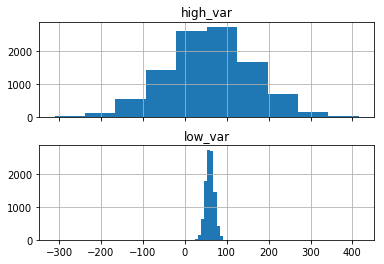

low_var      98.329144
high_var    415.452289
dtype: float64
low_var      23.694884
high_var   -310.794973
dtype: float64


In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# create empty dataframe to store variables
pop = pd.DataFrame()

# create two variables; one with low variance and one with high - mean=60 , low var stdev=10, high var stdev=100
pop['low_var'] = np.random.normal(60, 10, 10000)
pop['high_var'] = np.random.normal(60, 100, 10000)

pop.hist(layout=(2, 1), sharex=True)
plt.show()

#print population max and min for each variable
print(pop.max())
print(pop.min())

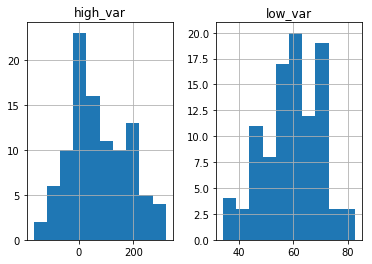

low_var     59.616024
high_var    71.978135
dtype: float64
low_var      10.546940
high_var    104.643132
dtype: float64
low_var      1.054694
high_var    10.464313
dtype: float64


In [2]:
 #create a sample (n=100) for each variable
sample = pd.DataFrame()

sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var'] = np.random.choice(pop['high_var'], 100)

#plot sample
sample.hist()
plt.show()

# check to see how well sample represents mean
s = sample.std(ddof=1)
n = len(sample['low_var'])
mu = sample.mean()
se = s/n**0.5
print(mu)
print(s)
print(se)

Note: sample with low variance more closely represents the population than the high variance.  Increasing the sample size decreases the sample error (increasing the estimation power)

In [3]:
# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100 #100 males and 100 females
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100)) 
#male: average height = 69" stdev = 8 / female: average height = 64" stdev = 5
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))
#male: average weight = 195 stdev = 25 / female: average weight = 166 stdev = 15

#statistical info for each numerical column
print(data.describe())

#group by gender and grab statistical info
print(data.groupby('gender').describe())
data.groupby('gender').describe()

           height      weight
count  200.000000  200.000000
mean    66.416747  178.937771
std      7.289509   22.790828
min     49.846537  121.376751
25%     61.176668  162.436411
50%     66.608882  177.613339
75%     70.088886  194.150666
max     86.809342  235.044221
       height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  63.996569  5.117876  53.607129  60.298704  63.859996   
male    100.0  68.836925  8.293679  49.846537  63.035930  68.864175   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  67.413539  77.369381  100.0  166.634822  16.435160  121.376751   
male    73.955907  86.809342  100.0  191.240720  21.637767  147.179154   

   

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  63.996569  5.117876  53.607129  60.298704  63.859996   
male    100.0  68.836925  8.293679  49.846537  63.035930  68.864175   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  67.413539  77.369381  100.0  166.634822  16.435160  121.376751   
male    73.955907  86.809342  100.0  191.240720  21.637767  147.179154   

                                                        
               25%         50%         75%         max  
gender                                                  
female  156.951203  165.992370  177.568170  208.667515  
male    177.770428  190.354071  204.573141  235.044221

# Brady Bunch Example

In [4]:
#1. create Brady Bunch data set
family = {'Name' : ['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Cousin Oliver'], 'Age' : [14, 12, 11, 10, 8, 6, 8]}
brady_df = pd.DataFrame(family, columns=['Name', 'Age'])
print(brady_df)

#calculate mean, median, mode, var, stdev, and standard error
bmean = brady_df['Age'].mean()
bmedian = brady_df['Age'].median()
bmode = brady_df['Age'].mode()
bvarsam = brady_df['Age'].var()
bvarpop = brady_df['Age'].var(ddof=0)
bstdevsam = brady_df['Age'].std()
bstdevpop = brady_df['Age'].std(ddof=0)
bse = bstdevsam/(len(brady_df['Name'])**0.5)

print('The mean is {}'.format(bmean))
print('The median is {}'.format(bmedian))
print('The mode is {}'.format(bmode))
print('The sample variance is {}'.format(bvarsam))
print('The population variance is {}'.format(bvarpop))
print('The sample standard deviation is {}'.format(bstdevsam))
print('The population standard deviation is {}'.format(bstdevpop))
print('The sample standard error is {}'.format(bse))

#print the sample statistics using the describe method on dataset
print(brady_df.describe()) #note that this method gives the sample stdev

            Name  Age
0           Greg   14
1         Marcia   12
2          Peter   11
3            Jan   10
4          Bobby    8
5          Cindy    6
6  Cousin Oliver    8
The mean is 9.857142857142858
The median is 10.0
The mode is 0    8
dtype: int64
The sample variance is 7.476190476190475
The population variance is 6.408163265306122
The sample standard deviation is 2.734262327610589
The population standard deviation is 2.531435020952764
The sample standard error is 1.0334540197243192
             Age
count   7.000000
mean    9.857143
std     2.734262
min     6.000000
25%     8.000000
50%    10.000000
75%    11.500000
max    14.000000


#2. Given this data, I would choose the mean as the central tendency and the standard deviation as the estimator of variance. I chose the mean because they are no significant outliers to create bias. While the variance measures the average degree of separation from the mean, I chose the standard deviation for the estimate of variance because the units match the mean (variance has squared units).

In [5]:
#3. Cindy has a birthday (age = 7)
brady_df.loc[5,'Age']=7
print(brady_df)

# recalculate central tendencies and estimators of variance
bmean = brady_df['Age'].mean()
bmedian = brady_df['Age'].median()
bmode = brady_df['Age'].mode()
bvarsam = brady_df['Age'].var()
bvarpop = brady_df['Age'].var(ddof=0)
bstdevsam = brady_df['Age'].std()
bstdevpop = brady_df['Age'].std(ddof=0)
bse = bstdevsam/(len(brady_df['Name'])**0.5)

print('The mean is {}'.format(bmean))
print('The median is {}'.format(bmedian))
print('The mode is {}'.format(bmode))
print('The sample variance is {}'.format(bvarsam))
print('The population variance is {}'.format(bvarpop))
print('The sample standard deviation is {}'.format(bstdevsam))
print('The population standard deviation is {}'.format(bstdevpop))
print('The sample standard error is {}'.format(bse))

            Name  Age
0           Greg   14
1         Marcia   12
2          Peter   11
3            Jan   10
4          Bobby    8
5          Cindy    7
6  Cousin Oliver    8
The mean is 10.0
The median is 10.0
The mode is 0    8
dtype: int64
The sample variance is 6.333333333333333
The population variance is 5.428571428571429
The sample standard deviation is 2.516611478423583
The population standard deviation is 2.32992949004287
The sample standard error is 0.9511897312113418


After updating Cindy's age to 7, the mean, variance, standard deviation, and standard error all changed slightly.  The median and mode stayed the same.

In [6]:
#4. Replace cousin oliver with 1-yr old Jessica
brady_df.loc[6]=('Jessica', 1)
print(brady_df)

# recalculate statistics
bmean = brady_df['Age'].mean()
bmedian = brady_df['Age'].median()
bmode = brady_df['Age'].mode()
bvarsam = brady_df['Age'].var()
bvarpop = brady_df['Age'].var(ddof=0)
bstdevsam = brady_df['Age'].std()
bstdevpop = brady_df['Age'].std(ddof=0)
bse = bstdevsam/(len(brady_df['Name'])**0.5)

print('The mean is {}'.format(bmean))
print('The median is {}'.format(bmedian))
print('The mode is {}'.format(bmode))
print('The sample variance is {}'.format(bvarsam))
print('The population variance is {}'.format(bvarpop))
print('The sample standard deviation is {}'.format(bstdevsam))
print('The population standard deviation is {}'.format(bstdevpop))
print('The sample standard error is {}'.format(bse))

      Name  Age
0     Greg   14
1   Marcia   12
2    Peter   11
3      Jan   10
4    Bobby    8
5    Cindy    7
6  Jessica    1
The mean is 9.0
The median is 10.0
The mode is 0     1
1     7
2     8
3    10
4    11
5    12
6    14
dtype: int64
The sample variance is 18.0
The population variance is 15.428571428571429
The sample standard deviation is 4.242640687119285
The population standard deviation is 3.927922024247863
The sample standard error is 1.6035674514745462


Now swapping Jessica for cousin Oliver, we see that the median is the only unchanged statistic.  I will switch my measure of central tendency to the median due to the fact that Jessica's age is much lower than the rest of them.  I will still use the standard deviation as the estimator of variance.

#5. On the 50th anniversary of The Brady Bunch four magazines polled their readers to see what percentage of them are fans of the show.<br>
TV Guide = 20%<br>
Entertainment Weekly = 23%<br>
Pop Culture Today = 17%<br>
SciPhi Phanatic = 5%

In [11]:
#Given info above - estimate the percentage of adults Americans that are fans of the show at the 50th anniversary

# We notice that SciPhi is a specialty magazine and would represent the population as well as the other 3 magazines; 
# therefore, we will drop that magazine from the estimate...

est = np.mean([0.20, 0.17, 0.23])*100
print('Answer: ' + str(est) + '%')

Answer: 20.0%
